In [1]:
import torch
import torchvision.datasets
import torchvision.models
from torch.utils.data import DataLoader, Dataset, SubsetRandomSampler
from torchvision import transforms
import torch.nn as nn
from tqdm import tqdm
from train_utils import train, test
from PIL import Image
import pandas as pd
import numpy as np
from convnet import ConvNet

In [2]:
cifar10_root = '../cifar10'

In [3]:
cifar10_train = torchvision.datasets.CIFAR10(cifar10_root,
                                            train=True,
                                            transform=transforms.Compose([
                                                                          # transforms.Resize(128),
                                                                          transforms.RandomHorizontalFlip(),
                                                                          transforms.ToTensor(),
                                                                          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                                                        ]))


cifar10_test = torchvision.datasets.CIFAR10(cifar10_root,
                                            train=False,
                                            transform=transforms.Compose([
                                                # transforms.Resize(128),
                                                transforms.ToTensor(),
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                              ]))

In [4]:
batch_size = 64
train_data_loader = DataLoader(cifar10_train, batch_size=batch_size, shuffle=True)
test_data_loader = DataLoader(cifar10_test, batch_size=batch_size, shuffle=False)

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"[INFO]: Computation device: {device}")

[INFO]: Computation device: cuda


In [6]:
import os

model_name = 'ConvNetD3'
dataset = 'cifar10'
model_path = f'./model_weight/{dataset}/{model_name}/'
if not os.path.exists(model_path):
    os.makedirs(model_path)
# Following ConvNetD3's definition from the DATM paper, but first one changed to 32 from 128
net_width, net_depth, net_act, net_norm, net_pooling = 32, 3, 'relu', 'instancenorm', 'avgpooling'
model = ConvNet(channel=3, num_classes=10, net_width=net_width, net_depth=3, net_act=net_act, net_norm=net_norm, net_pooling=net_pooling)

In [7]:
train_record, test_record  = train(model, model_path, train_data_loader, test_data_loader, num_epochs=100)

Epoch 1: 100%|██████████| 782/782 [00:09<00:00, 83.79it/s, loss=1.13] 


epoch: 1 done, loss: 0.021598266437649727
Acc: 0.6276
[0.001]


Epoch 2: 100%|██████████| 782/782 [00:11<00:00, 70.66it/s, loss=0.766]


epoch: 2 done, loss: 0.016041524708271027
Acc: 0.6633
[0.001]


Epoch 3: 100%|██████████| 782/782 [00:10<00:00, 76.92it/s, loss=1.49] 


epoch: 3 done, loss: 0.014279552735388279
Acc: 0.6809
[0.001]


Epoch 4: 100%|██████████| 782/782 [00:10<00:00, 73.22it/s, loss=1.09] 


epoch: 4 done, loss: 0.01327113714069128
Acc: 0.7058
[0.001]


Epoch 5: 100%|██████████| 782/782 [00:11<00:00, 67.02it/s, loss=0.531]


epoch: 5 done, loss: 0.012515728361904621
Acc: 0.7073
[0.001]


Epoch 6: 100%|██████████| 782/782 [00:11<00:00, 66.92it/s, loss=0.541]


epoch: 6 done, loss: 0.011965751647949219
Acc: 0.7251
[0.001]


Epoch 7: 100%|██████████| 782/782 [00:09<00:00, 83.54it/s, loss=0.562]


epoch: 7 done, loss: 0.011614710092544556
Acc: 0.7329
[0.001]


Epoch 8: 100%|██████████| 782/782 [00:11<00:00, 67.09it/s, loss=0.805]


epoch: 8 done, loss: 0.011176105588674545
Acc: 0.7213
[0.001]


Epoch 9: 100%|██████████| 782/782 [00:10<00:00, 72.28it/s, loss=0.316]


epoch: 9 done, loss: 0.01086026057600975
Acc: 0.7398
[0.001]


Epoch 10: 100%|██████████| 782/782 [00:12<00:00, 61.45it/s, loss=0.567]


epoch: 10 done, loss: 0.010618058033287525
Acc: 0.7466
[0.001]


Epoch 11: 100%|██████████| 782/782 [00:10<00:00, 73.50it/s, loss=0.79] 


epoch: 11 done, loss: 0.010334097780287266
Acc: 0.7447
[0.001]


Epoch 12: 100%|██████████| 782/782 [00:10<00:00, 76.87it/s, loss=0.449]


epoch: 12 done, loss: 0.010201224125921726
Acc: 0.751
[0.001]


Epoch 13: 100%|██████████| 782/782 [00:11<00:00, 68.67it/s, loss=0.72] 


epoch: 13 done, loss: 0.00994784664362669
Acc: 0.7497
[0.001]


Epoch 14: 100%|██████████| 782/782 [00:10<00:00, 74.01it/s, loss=0.514]


epoch: 14 done, loss: 0.009730113670229912
Acc: 0.7571
[0.001]


Epoch 15: 100%|██████████| 782/782 [00:10<00:00, 71.60it/s, loss=0.857]


epoch: 15 done, loss: 0.009637354873120785
Acc: 0.7604
[0.001]


Epoch 16: 100%|██████████| 782/782 [00:11<00:00, 70.31it/s, loss=0.651]


epoch: 16 done, loss: 0.009459166787564754
Acc: 0.765
[0.001]


Epoch 17: 100%|██████████| 782/782 [00:11<00:00, 69.75it/s, loss=0.632]


epoch: 17 done, loss: 0.009314792230725288
Acc: 0.7657
[0.001]


Epoch 18: 100%|██████████| 782/782 [00:10<00:00, 74.70it/s, loss=0.713]


epoch: 18 done, loss: 0.009194334037601948
Acc: 0.7672
[0.001]


Epoch 19: 100%|██████████| 782/782 [00:11<00:00, 65.31it/s, loss=0.693]


epoch: 19 done, loss: 0.00915096327662468
Acc: 0.7687
[0.001]


Epoch 20: 100%|██████████| 782/782 [00:12<00:00, 64.85it/s, loss=0.526]


epoch: 20 done, loss: 0.008931085467338562
Acc: 0.7665
[0.001]


Epoch 21: 100%|██████████| 782/782 [00:11<00:00, 65.19it/s, loss=1.36] 


epoch: 21 done, loss: 0.008939966559410095
Acc: 0.7683
[0.001]


Epoch 22: 100%|██████████| 782/782 [00:11<00:00, 66.08it/s, loss=0.37] 


epoch: 22 done, loss: 0.008771856315433979
Acc: 0.7662
[0.001]


Epoch 23: 100%|██████████| 782/782 [00:11<00:00, 65.82it/s, loss=0.567]


epoch: 23 done, loss: 0.008653734810650349
Acc: 0.7649
[0.001]


Epoch 24: 100%|██████████| 782/782 [00:11<00:00, 67.33it/s, loss=0.284]


epoch: 24 done, loss: 0.008606218732893467
Acc: 0.7684
[0.001]


Epoch 25: 100%|██████████| 782/782 [00:11<00:00, 69.28it/s, loss=1.1]  


epoch: 25 done, loss: 0.008481759577989578
Acc: 0.7708
[0.0001]


Epoch 26: 100%|██████████| 782/782 [00:10<00:00, 76.94it/s, loss=0.106]


epoch: 26 done, loss: 0.007474200800061226
Acc: 0.7846
[0.0001]


Epoch 27: 100%|██████████| 782/782 [00:11<00:00, 69.04it/s, loss=0.192]


epoch: 27 done, loss: 0.00730946334078908
Acc: 0.7855
[0.0001]


Epoch 28: 100%|██████████| 782/782 [00:10<00:00, 77.48it/s, loss=1.11] 


epoch: 28 done, loss: 0.007288036402314901
Acc: 0.7865
[0.0001]


Epoch 29: 100%|██████████| 782/782 [00:10<00:00, 72.27it/s, loss=0.348]


epoch: 29 done, loss: 0.007214935962110758
Acc: 0.7883
[0.0001]


Epoch 30: 100%|██████████| 782/782 [00:11<00:00, 70.68it/s, loss=0.463]


epoch: 30 done, loss: 0.007153392303735018
Acc: 0.7875
[0.0001]


Epoch 31: 100%|██████████| 782/782 [00:10<00:00, 76.61it/s, loss=0.632]


epoch: 31 done, loss: 0.0071150450967252254
Acc: 0.7871
[0.0001]


Epoch 32: 100%|██████████| 782/782 [00:11<00:00, 66.78it/s, loss=0.441]


epoch: 32 done, loss: 0.007100749295204878
Acc: 0.7887
[0.0001]


Epoch 33: 100%|██████████| 782/782 [00:11<00:00, 67.73it/s, loss=0.71] 


epoch: 33 done, loss: 0.007050182204693556
Acc: 0.789
[0.0001]


Epoch 34: 100%|██████████| 782/782 [00:09<00:00, 80.20it/s, loss=0.292]


epoch: 34 done, loss: 0.007101236842572689
Acc: 0.7896
[1e-05]


Epoch 35: 100%|██████████| 782/782 [00:09<00:00, 81.41it/s, loss=0.237]


epoch: 35 done, loss: 0.006883303634822369
Acc: 0.7895
[1e-05]


Epoch 36: 100%|██████████| 782/782 [00:10<00:00, 74.59it/s, loss=0.334]


epoch: 36 done, loss: 0.006929977796971798
Acc: 0.7886
[1e-05]


Epoch 37: 100%|██████████| 782/782 [00:10<00:00, 75.32it/s, loss=0.726]


epoch: 37 done, loss: 0.0069179111160337925
Acc: 0.7896
[1e-05]


Epoch 38: 100%|██████████| 782/782 [00:09<00:00, 79.04it/s, loss=0.536]


epoch: 38 done, loss: 0.006869572680443525
Acc: 0.7907
[1e-05]


Epoch 39: 100%|██████████| 782/782 [00:10<00:00, 74.28it/s, loss=0.225]


epoch: 39 done, loss: 0.00688560027629137
Acc: 0.7901
[1e-05]


Epoch 40: 100%|██████████| 782/782 [00:11<00:00, 68.09it/s, loss=0.116]


epoch: 40 done, loss: 0.0068917409516870975
Acc: 0.7895
[1e-05]


Epoch 41: 100%|██████████| 782/782 [00:11<00:00, 69.41it/s, loss=0.336]


epoch: 41 done, loss: 0.006864639930427074
Acc: 0.7892
[1e-05]


Epoch 42: 100%|██████████| 782/782 [00:09<00:00, 80.90it/s, loss=0.332]


epoch: 42 done, loss: 0.006889486685395241
Acc: 0.7896
[1e-05]


Epoch 43: 100%|██████████| 782/782 [00:10<00:00, 75.09it/s, loss=0.159]


epoch: 43 done, loss: 0.00690542533993721
Acc: 0.7901
[1.0000000000000002e-06]


Epoch 44: 100%|██████████| 782/782 [00:10<00:00, 78.14it/s, loss=0.368]


epoch: 44 done, loss: 0.0068905227817595005
Acc: 0.7899
[1.0000000000000002e-06]


Epoch 45: 100%|██████████| 782/782 [00:10<00:00, 75.77it/s, loss=0.444]


epoch: 45 done, loss: 0.006891538389027119
Acc: 0.79
[1.0000000000000002e-06]


Epoch 46: 100%|██████████| 782/782 [00:10<00:00, 74.70it/s, loss=0.247]


epoch: 46 done, loss: 0.0068746465258300304
Acc: 0.7899
[1.0000000000000002e-06]


Epoch 47: 100%|██████████| 782/782 [00:11<00:00, 66.59it/s, loss=0.662]


epoch: 47 done, loss: 0.0068647894077003
Acc: 0.7899
[1.0000000000000002e-06]


Epoch 48: 100%|██████████| 782/782 [00:11<00:00, 68.68it/s, loss=0.358]


epoch: 48 done, loss: 0.006876880303025246
Acc: 0.7894
[1.0000000000000002e-06]


Epoch 49: 100%|██████████| 782/782 [00:11<00:00, 67.71it/s, loss=0.446]


epoch: 49 done, loss: 0.006895843427628279
Acc: 0.7894
[1.0000000000000002e-06]


Epoch 50: 100%|██████████| 782/782 [00:10<00:00, 71.58it/s, loss=0.338]


epoch: 50 done, loss: 0.0068622250109910965
Acc: 0.7895
[1.0000000000000002e-06]


Epoch 51: 100%|██████████| 782/782 [00:11<00:00, 66.61it/s, loss=1.04] 


epoch: 51 done, loss: 0.0068433815613389015
Acc: 0.7892
[1.0000000000000002e-06]


Epoch 52: 100%|██████████| 782/782 [00:12<00:00, 64.09it/s, loss=0.412]


epoch: 52 done, loss: 0.0068361214362084866
Acc: 0.7894
[1.0000000000000002e-06]


Epoch 53: 100%|██████████| 782/782 [00:11<00:00, 66.28it/s, loss=0.435]


epoch: 53 done, loss: 0.00685197114944458
Acc: 0.7895
[1.0000000000000002e-06]


Epoch 54: 100%|██████████| 782/782 [00:11<00:00, 65.19it/s, loss=0.575]


epoch: 54 done, loss: 0.006887747440487146
Acc: 0.7894
[1.0000000000000002e-06]


Epoch 55: 100%|██████████| 782/782 [00:12<00:00, 64.13it/s, loss=0.115]


epoch: 55 done, loss: 0.0068341027945280075
Acc: 0.7896
[1.0000000000000002e-06]


Epoch 56: 100%|██████████| 782/782 [00:10<00:00, 76.68it/s, loss=0.227]


epoch: 56 done, loss: 0.006858821026980877
Acc: 0.7894
[1.0000000000000002e-06]


Epoch 57: 100%|██████████| 782/782 [00:11<00:00, 68.22it/s, loss=0.231]


epoch: 57 done, loss: 0.0068853371776640415
Acc: 0.7893
[1.0000000000000002e-06]


Epoch 58: 100%|██████████| 782/782 [00:11<00:00, 68.49it/s, loss=0.153]


epoch: 58 done, loss: 0.006894741207361221
Acc: 0.7892
[1.0000000000000002e-06]


Epoch 59: 100%|██████████| 782/782 [00:11<00:00, 66.83it/s, loss=0.316]


epoch: 59 done, loss: 0.006809727754443884
Acc: 0.7897
[1.0000000000000002e-06]


Epoch 60: 100%|██████████| 782/782 [00:11<00:00, 69.05it/s, loss=0.254]


epoch: 60 done, loss: 0.006851853337138891
Acc: 0.79
[1.0000000000000002e-06]


Epoch 61: 100%|██████████| 782/782 [00:11<00:00, 68.02it/s, loss=0.352]


epoch: 61 done, loss: 0.006881003268063068
Acc: 0.7895
[1.0000000000000002e-06]


Epoch 62: 100%|██████████| 782/782 [00:09<00:00, 82.16it/s, loss=0.172]


epoch: 62 done, loss: 0.006860676687210798
Acc: 0.7893
[1.0000000000000002e-06]


Epoch 63: 100%|██████████| 782/782 [00:09<00:00, 83.95it/s, loss=0.574]


epoch: 63 done, loss: 0.006825443357229233
Acc: 0.7896
[1.0000000000000002e-06]


Epoch 64: 100%|██████████| 782/782 [00:09<00:00, 84.37it/s, loss=0.485]


epoch: 64 done, loss: 0.006837448105216026
Acc: 0.7897
[1.0000000000000002e-06]


Epoch 65: 100%|██████████| 782/782 [00:09<00:00, 79.14it/s, loss=0.392]


epoch: 65 done, loss: 0.006849289871752262
Acc: 0.7896
[1.0000000000000002e-06]


Epoch 66: 100%|██████████| 782/782 [00:12<00:00, 65.11it/s, loss=0.65] 


epoch: 66 done, loss: 0.006869794335216284
Acc: 0.7899
[1.0000000000000002e-06]


Epoch 67: 100%|██████████| 782/782 [00:10<00:00, 72.24it/s, loss=0.496]


epoch: 67 done, loss: 0.0068822563625872135
Acc: 0.7896
[1.0000000000000002e-06]


Epoch 68: 100%|██████████| 782/782 [00:11<00:00, 65.86it/s, loss=1.06] 


epoch: 68 done, loss: 0.006860814057290554
Acc: 0.7893
[1.0000000000000002e-06]


Epoch 69: 100%|██████████| 782/782 [00:10<00:00, 71.62it/s, loss=0.976]


epoch: 69 done, loss: 0.006816952954977751
Acc: 0.7896
[1.0000000000000002e-06]


Epoch 70: 100%|██████████| 782/782 [00:12<00:00, 63.20it/s, loss=0.569]


epoch: 70 done, loss: 0.006891970057040453
Acc: 0.7899
[1.0000000000000002e-06]


Epoch 71: 100%|██████████| 782/782 [00:11<00:00, 71.01it/s, loss=0.281]


epoch: 71 done, loss: 0.006884886417537928
Acc: 0.7899
[1.0000000000000002e-06]


Epoch 72: 100%|██████████| 782/782 [00:09<00:00, 78.53it/s, loss=0.705]


epoch: 72 done, loss: 0.006885825656354427
Acc: 0.7896
[1.0000000000000002e-06]


Epoch 73: 100%|██████████| 782/782 [00:11<00:00, 68.90it/s, loss=0.479]


epoch: 73 done, loss: 0.0068342434242367744
Acc: 0.7897
[1.0000000000000002e-06]


Epoch 74: 100%|██████████| 782/782 [00:09<00:00, 80.98it/s, loss=0.705]


epoch: 74 done, loss: 0.006854920648038387
Acc: 0.7902
[1.0000000000000002e-06]


Epoch 75: 100%|██████████| 782/782 [00:10<00:00, 73.61it/s, loss=0.203]


epoch: 75 done, loss: 0.006881390698254108
Acc: 0.7899
[1.0000000000000002e-06]


Epoch 76: 100%|██████████| 782/782 [00:11<00:00, 70.30it/s, loss=0.566]


epoch: 76 done, loss: 0.006834940053522587
Acc: 0.7899
[1.0000000000000002e-06]


Epoch 77: 100%|██████████| 782/782 [00:10<00:00, 77.08it/s, loss=0.521]


epoch: 77 done, loss: 0.006872617639601231
Acc: 0.79
[1.0000000000000002e-06]


Epoch 78: 100%|██████████| 782/782 [00:10<00:00, 74.93it/s, loss=0.191]


epoch: 78 done, loss: 0.006840503308922052
Acc: 0.7899
[1.0000000000000002e-06]


Epoch 79: 100%|██████████| 782/782 [00:10<00:00, 74.33it/s, loss=0.13] 


epoch: 79 done, loss: 0.006817499175667763
Acc: 0.7899
[1.0000000000000002e-06]


Epoch 80: 100%|██████████| 782/782 [00:10<00:00, 73.34it/s, loss=0.25] 


epoch: 80 done, loss: 0.006875238381326199
Acc: 0.79
[1.0000000000000002e-06]


Epoch 81: 100%|██████████| 782/782 [00:10<00:00, 74.51it/s, loss=0.684]


epoch: 81 done, loss: 0.00689471373334527
Acc: 0.7902
[1.0000000000000002e-06]


Epoch 82: 100%|██████████| 782/782 [00:10<00:00, 74.85it/s, loss=0.232]


epoch: 82 done, loss: 0.006864327006042004
Acc: 0.7903
[1.0000000000000002e-06]


Epoch 83: 100%|██████████| 782/782 [00:10<00:00, 75.12it/s, loss=0.443]


epoch: 83 done, loss: 0.006807511206716299
Acc: 0.7906
[1.0000000000000002e-06]


Epoch 84: 100%|██████████| 782/782 [00:10<00:00, 74.36it/s, loss=0.803]


epoch: 84 done, loss: 0.006857899017632008
Acc: 0.7906
[1.0000000000000002e-06]


Epoch 85: 100%|██████████| 782/782 [00:10<00:00, 72.33it/s, loss=0.653]


epoch: 85 done, loss: 0.00688333623111248
Acc: 0.7904
[1.0000000000000002e-06]


Epoch 86: 100%|██████████| 782/782 [00:10<00:00, 72.98it/s, loss=0.143]


epoch: 86 done, loss: 0.006888129282742739
Acc: 0.7903
[1.0000000000000002e-06]


Epoch 87: 100%|██████████| 782/782 [00:10<00:00, 72.76it/s, loss=1.01] 


epoch: 87 done, loss: 0.00684752780944109
Acc: 0.7907
[1.0000000000000002e-06]


Epoch 88: 100%|██████████| 782/782 [00:10<00:00, 75.63it/s, loss=0.634]


epoch: 88 done, loss: 0.006918146274983883
Acc: 0.7902
[1.0000000000000002e-06]


Epoch 89: 100%|██████████| 782/782 [00:10<00:00, 71.22it/s, loss=0.252]


epoch: 89 done, loss: 0.0068577793426811695
Acc: 0.7897
[1.0000000000000002e-06]


Epoch 90: 100%|██████████| 782/782 [00:10<00:00, 76.02it/s, loss=0.235]


epoch: 90 done, loss: 0.006823784206062555
Acc: 0.7897
[1.0000000000000002e-06]


Epoch 91: 100%|██████████| 782/782 [00:10<00:00, 75.76it/s, loss=0.188]


epoch: 91 done, loss: 0.006861616857349873
Acc: 0.7899
[1.0000000000000002e-06]


Epoch 92: 100%|██████████| 782/782 [00:10<00:00, 76.54it/s, loss=0.2]  


epoch: 92 done, loss: 0.006803668104112148
Acc: 0.7902
[1.0000000000000002e-06]


Epoch 93: 100%|██████████| 782/782 [00:10<00:00, 76.67it/s, loss=0.574]


epoch: 93 done, loss: 0.006833989173173904
Acc: 0.7899
[1.0000000000000002e-06]


Epoch 94: 100%|██████████| 782/782 [00:10<00:00, 75.38it/s, loss=0.414]


epoch: 94 done, loss: 0.006825609598308802
Acc: 0.7896
[1.0000000000000002e-06]


Epoch 95: 100%|██████████| 782/782 [00:10<00:00, 72.24it/s, loss=0.495]


epoch: 95 done, loss: 0.0068213194608688354
Acc: 0.79
[1.0000000000000002e-06]


Epoch 96: 100%|██████████| 782/782 [00:10<00:00, 74.01it/s, loss=0.0788]


epoch: 96 done, loss: 0.006855701096355915
Acc: 0.7897
[1.0000000000000002e-06]


Epoch 97: 100%|██████████| 782/782 [00:10<00:00, 73.65it/s, loss=0.158]


epoch: 97 done, loss: 0.006840622518211603
Acc: 0.7904
[1.0000000000000002e-06]


Epoch 98: 100%|██████████| 782/782 [00:10<00:00, 77.22it/s, loss=0.54] 


epoch: 98 done, loss: 0.006826532538980246
Acc: 0.7903
[1.0000000000000002e-06]


Epoch 99: 100%|██████████| 782/782 [00:09<00:00, 78.28it/s, loss=0.725]


epoch: 99 done, loss: 0.00687848636880517
Acc: 0.7903
[1.0000000000000002e-06]


Epoch 100: 100%|██████████| 782/782 [00:10<00:00, 78.06it/s, loss=0.34] 


epoch: 100 done, loss: 0.0068222107365727425
Acc: 0.7902
[1.0000000000000002e-06]
Time taken: 1251.969926 seconds


In [8]:
test(model, f'{model_path}/model.bin', test_data_loader, criterion=nn.CrossEntropyLoss()) #best_acc, test_loss

(0.7907, tensor(0.0098, device='cuda:0'))

<AxesSubplot: >

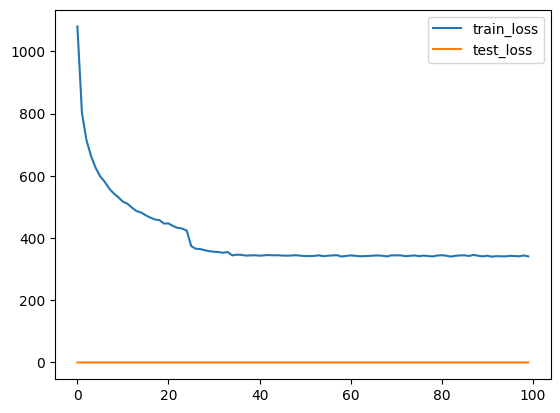

In [9]:
import pandas as pd
results = pd.DataFrame([])
results['train_loss']  = train_record
results['test_loss']  = test_record
results.plot.line(y=['train_loss', 'test_loss'])